# Quantal Risk Assessment Database (QRAD)

Add QRAD as an additional dataset for easy use with python BMDS:

> Wheeler MW, Piegorsch WW, Bailer AJ. Quantal Risk Assessment Database: A Database for Exploring Patterns in Quantal Dose-Response Data in Risk Assessment and its Application to Develop Priors for Bayesian Dose-Response Analysis. Risk Anal. 2019;39(3):616-629. doi:10.1111/risa.13218

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6408269/

Per the paper, download data from here:
http://www.users.miamioh.edu/baileraj/research/


To convert from .RData to JSON:

```R
load('./database.RData')
json_data <- jsonlite::toJSON(final.data)
write(json_data, file = './qrad.json')
```

We've taken the JSON export and saved it as a zipped CSV for easier loading into python and a compressed filesize.

## Loading the dataset into pandas

In [1]:
import pandas as pd

/Users/shapiromatron/dev/bmds/venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('./data/qrad.csv.zip')
print(df.shape)

(2727, 11)


In [3]:
df.query('ID == 500')

,ID,chemical,data.source,CASRN,dose,r.dose,n,obs,organ,effect,study.source
1778,500,CHLOROPRENE,IRIS,126998,0.0,0.00,50,3,nasal passages,nonneoplastic histopathology,NTP (1998). Toxicology and carcinogenesis stud...
1779,500,CHLOROPRENE,IRIS,126998,12.8,0.16,50,12,nasal passages,nonneoplastic histopathology,NTP (1998). Toxicology and carcinogenesis stud...
1780,500,CHLOROPRENE,IRIS,126998,32.0,0.40,49,46,nasal passages,nonneoplastic histopathology,NTP (1998). Toxicology and carcinogenesis stud...
1781,500,CHLOROPRENE,IRIS,126998,80.0,1.00,49,48,nasal passages,nonneoplastic histopathology,NTP (1998). Toxicology and carcinogenesis stud...


## Running a single analysis

In [4]:
import bmds
from bmds.bmds3 import BmdsSession
from bmds import DichotomousDataset

First, build a BMDS dataset:

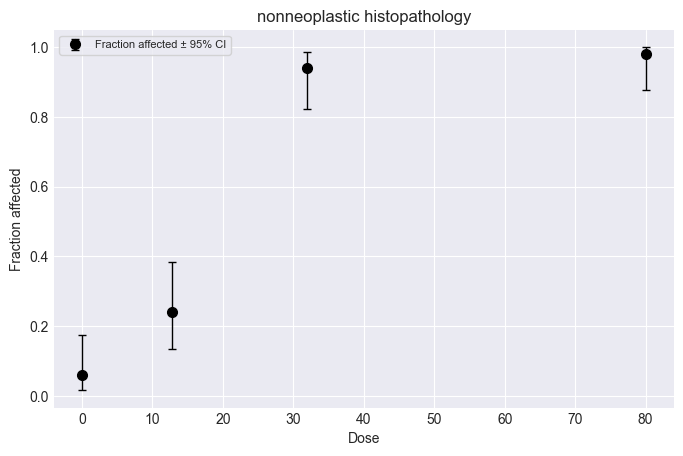

In [5]:
def to_dataset(subset) -> DichotomousDataset:
        return DichotomousDataset(
            doses=subset.dose.tolist(), 
            ns=subset.n.tolist(), 
            incidences=subset.obs.tolist(),
            id=subset.ID.iloc[0],
            name=subset.effect.iloc[0]
        )    
    
dataset = to_dataset(df.query('ID == 500'))
dataset.plot()

Next, run an analysis. Here we'll run bayeisan model analysis with model averaging:

In [6]:
session1 = bmds.session.Bmds330(dataset=dataset)
session1.add_default_bayesian_models()
session1.execute()

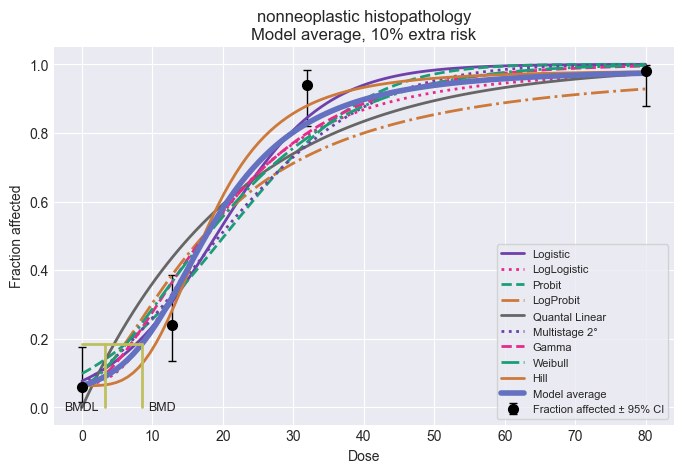

In [7]:
session1.model_average.plot()

In [8]:
res = session1.model_average.results
print(f"BMD = {res.bmd:.2f} [{res.bmdl:.2f}, {res.bmdu:.2f}]")

BMD = 8.50 [3.23, 11.53]
